In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

EDA


In [29]:
gold_data = pd.read_csv('gold_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [30]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [31]:
gold_data.shape

(2290, 6)

In [32]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [33]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

Positive Correlation &
Negative Correlation

In [34]:
correlation = gold_data[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']].corr()

<Axes: >

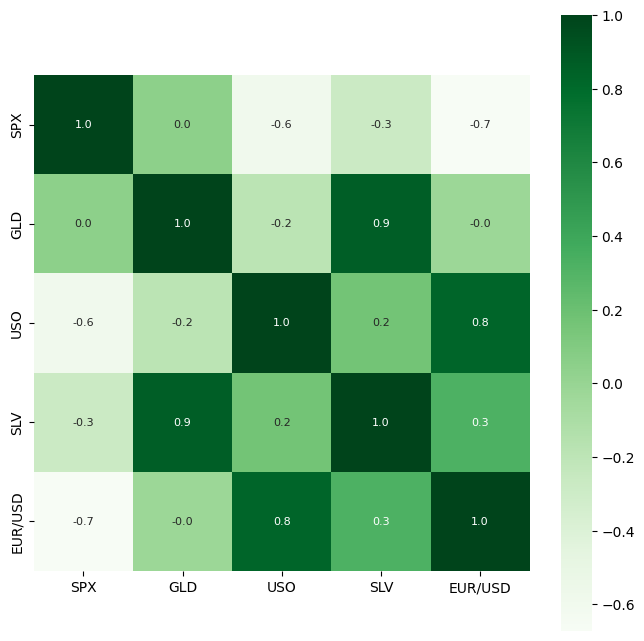

In [36]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

In [37]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

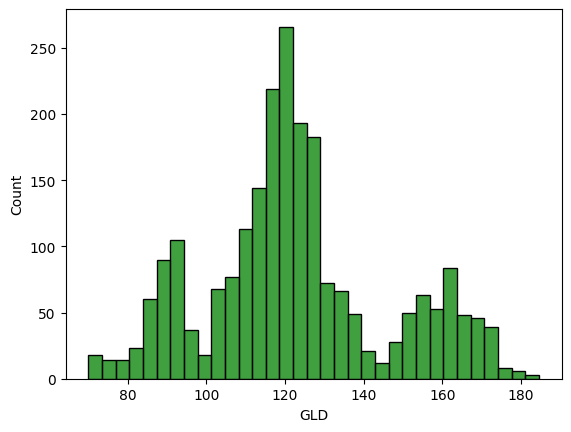

In [41]:
sns.histplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [42]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [43]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [45]:
regressor = RandomForestRegressor(n_estimators=100)

In [46]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [47]:
test_data_prediction = regressor.predict(X_test)

In [48]:
print(test_data_prediction)

[168.5768996   81.81739997 115.95740066 127.61680058 120.69500139
 154.71479792 150.07659805 126.19860009 117.49169899 126.09290069
 116.57530111 171.89060074 141.76259862 167.95929823 115.18620007
 117.7028007  138.79350279 170.37650166 159.64570318 156.49789998
 155.02610025 125.24080058 176.06100051 157.3179036  125.16610055
  93.63709992  77.36380047 120.79350013 119.08049907 167.45039977
  88.08770045 125.3356998   91.0367009  117.55790044 121.14319905
 136.17480091 115.49070082 115.06170106 148.06440054 107.23590094
 104.32240242  87.12749778 126.53670049 117.84440049 153.71359914
 119.49039977 108.38779983 108.02259847  93.16730056 127.20589753
  75.56029998 113.6778995  121.33669979 111.26949917 118.83559899
 120.63739939 159.28750051 168.25650115 146.9355969   85.98979868
  94.11800038  86.84629897  90.58700008 119.01880061 126.42440062
 127.40589985 169.63459987 122.40969927 117.25679891  98.65490005
 168.53410159 142.66219808 131.98360249 121.14700225 121.25809948
 119.82700

In [49]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9888526918619881


Compare the Actual Values and Predicted Values in a Plot

In [50]:
Y_test = list(Y_test)

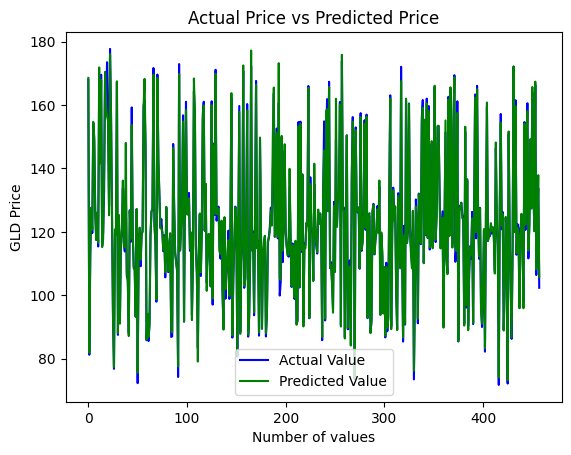

In [51]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()